In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import rpy2
from sklearn.decomposition import PCA


#參數設定
# set seed
np.random.seed(666)

# year(since the inception of businesses to year '10')
p = 10

# new ventures size
s = 1000

In [138]:
# exponentional growth
e = []
for i in range(s):
    for j in np.linspace(1, p, 10): #arange去查 也可以用linspace做
        r = np.exp(j) * np.random.uniform(0.1, 1)  #add some noise in the data
        e.append([i, j, r, 'e']) #"e" is a labe (stands for expointial)
e = pd.DataFrame(e, columns=['i', 'j', 'r', 'g']) #如果不給e的話就會從1 2 3 4開始
# all the data point like 'i', 'j', 'r', 'g' will be in "e"

# inverted-u shape
b1, b2 = 4 * 1000, - 4 * 100
u =[]
for i in range(s):
    for j in np.linspace(1, p, 10):
        r = (b1 * j + b2 * j ** 2) * np.random.uniform(0.1, 1)
        u.append([i, j, r, 'u'])     
u = pd.DataFrame(u, columns=['i', 'j', 'r', 'g'])

# log shape #stop growing
b = 2000
l = []
for i in range(s): #company stop to groth 
    for j in np.linspace(1, p, 10):
        r = b * np.log(j) * np.random.uniform(0.1, 1)
        l.append([i, j, r, 'l'])
l = pd.DataFrame(l, columns=['i', 'j', 'r', 'g'])

# append data
df = pd.concat([e, u, l], axis=0, )
df

,i,j,r,g
0,0,1.0,2.584070,e
1,0,2.0,5.108612,e
2,0,3.0,6.281080,e
3,0,4.0,10.675528,e
4,0,5.0,56.298581,e
...,...,...,...,...
9995,999,6.0,2172.841085,l
9996,999,7.0,2149.676176,l
9997,999,8.0,440.833277,l
9998,999,9.0,4144.939008,l


In [204]:
# df.loc[df['g'] == 'u']['r'].mean
# df.loc[df['g'] == 'e']['r'].mean
print(df.loc[df['g'] == 'l']['r'].mean() , df.loc[df['g'] == 'e']['r'].mean(), df.loc[df['g'] == 'u']['r'].mean())
print(df.loc[df['g'] == 'l']['r'].max() , df.loc[df['g'] == 'e']['r'].max(), df.loc[df['g'] == 'u']['r'].max())
print(df.loc[df['g'] == 'l']['r'].min() , df.loc[df['g'] == 'e']['r'].min(), df.loc[df['g'] == 'u']['r'].min())

1658.4483905912537 1917.0139069506633 3615.362248438931
4603.511242539276 21998.008102631804 9993.106571096423
0.0 0.2723241185362064 0.0


/Users/user/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/user/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/user/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

Text(0, 0.5, 'Density')

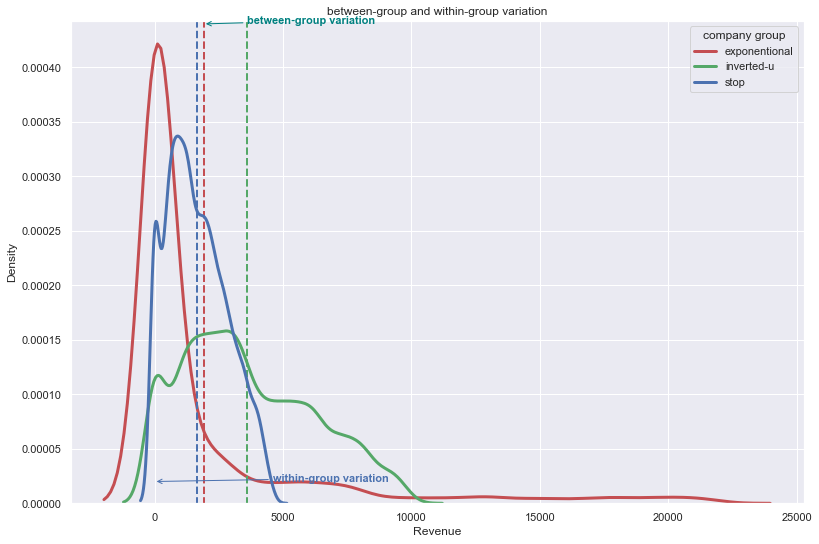

In [210]:
x = df.loc[df['g'] == 'e']['r'].values
x2 = df.loc[df['g'] == 'u']['r'].values
x3 = df.loc[df['g'] == 'l']['r'].values

# Draw the density plot
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.distplot(x, hist = False, kde = True,
                 kde_kws = {'linewidth': 3}, label = 'exponentional', color='r')
plt.axvline(1917.0139069506633,11,0, linewidth=2, color='r', linestyle = '--')

sns.distplot(x2, hist = False, kde = True,
                 kde_kws = {'linewidth': 3}, label = 'inverted-u', color='g')
plt.axvline(3615.362248438931, 11,0,  linewidth=2, color='g', linestyle = '--')

sns.distplot(x3, hist = False, kde = True,
                 kde_kws = {'linewidth': 3}, label = 'stop', color='b')
plt.axvline(1658.4483905912537, 11,0, linewidth=2, color='b', linestyle = '--')

# add the annotation
plt.annotate('between-group variation', xy=(1917.0139069506633, 0.00044), weight='bold', color='teal',
             xytext=(3615.362248438931, 0.00044), fontsize=11, arrowprops=dict(arrowstyle="->", color='teal'))

plt.annotate('within-group variation', xy=(0.0, 0.00002), weight='bold', color='b',
             xytext=(4603.511242539276, 0.00002), fontsize=11, arrowprops=dict(arrowstyle="->", color='b'))



# Plot formatting
plt.legend(prop={'size': 11}, title = 'company group')
plt.title('between-group and within-group variation')
plt.xlabel('Revenue')
plt.ylabel('Density')

In [98]:
from sklearn.preprocessing import StandardScaler
features = ['i', 'j', 'r']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['g']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [99]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [101]:
finalDf = pd.concat([principalDf, df[['g']]], axis = 1)
finalDf

ValueError: Shape of passed values is (28000, 3), indices imply (19000, 3)